# _That one_ MNIST Data Logistic Regression Model

This notebook is a product of my (derivative) work while enrolled in Duke University's _Introduction to Machine Learning_ course on Coursera (great course by the way!). 

### Imports

In [89]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

### Loading MNIST data

In [90]:
mnist_train = datasets.MNIST(root="./datasets", train=True, 
                             transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, 
                            transform=transforms.ToTensor(), download=True)

### Set up the batches

In [91]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = 100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = 100, shuffle=False)

#constants to avoid magic numbers
IMG_HEIGHT = 28
IMG_WIDTH = 28
IMG_SIZE_VEC = IMG_HEIGHT*IMG_WIDTH
OUTPUT_LAYER_SIZE = 10

#making it concrete
data_iterator = iter(train_loader)
images, labels = next(data_iterator)

print("Image batch dimension:  ", images.shape)
print("Label batch dimension:  ", labels.shape)

Image batch dimension:   torch.Size([100, 1, 28, 28])
Label batch dimension:   torch.Size([100])


### The code

In [92]:
# definitions
W = torch.randn(IMG_SIZE_VEC, OUTPUT_LAYER_SIZE)/np.sqrt(IMG_SIZE_VEC)
W.requires_grad_()
b = torch.zeros(OUTPUT_LAYER_SIZE, requires_grad=True)

# minimization
optimizer = torch.optim.SGD([W,b], lr=0.1)

i = 0
# go through each batch (600 batches -> 60000 images)
for images, labels in train_loader:
    i += 1
    if i%100 == 0: print("Batch number: {}".format(i))
    # reset the gradient at each batch
    optimizer.zero_grad()
    
    # the so called forward pass
    # vectorize the images in the batches (100 batches, 28*28 components)
    x = images.view(-1, IMG_SIZE_VEC)

    # initial value for y
    y = torch.matmul(x, W) + b
    
    # the loss function
    cross_entropy = F.cross_entropy(y, labels)

    # backward pass (the actual minimization)
    cross_entropy.backward()
    optimizer.step()

Batch number: 100
Batch number: 200
Batch number: 300
Batch number: 400
Batch number: 500
Batch number: 600


### Tests

In [93]:
correct = 0
n_samples = len(mnist_test)

with torch.no_grad():
    # go through the test set minibatches 
    for images, labels in test_loader:
        # forward pass
        # vectorize it
        x = images.view(-1, IMG_SIZE_VEC) #(100, 28*28)
        
        #calculate the prediction
        y = torch.matmul(x, W) + b
        
        # get index of the biggest value of the vector y
        # that is, it represents the digit the model think the 
        # image represents for each image int the batch
        predictions = torch.argmax(y, dim=1)
        
        #right predictions "boolean" vector
        predictions_vec = (predictions == labels)
        
        correct += torch.sum(predictions_vec)
    
print('Test accuracy: {}'.format(correct/n_samples))

Test accuracy: 0.9017000198364258


### Visualizing the parameters

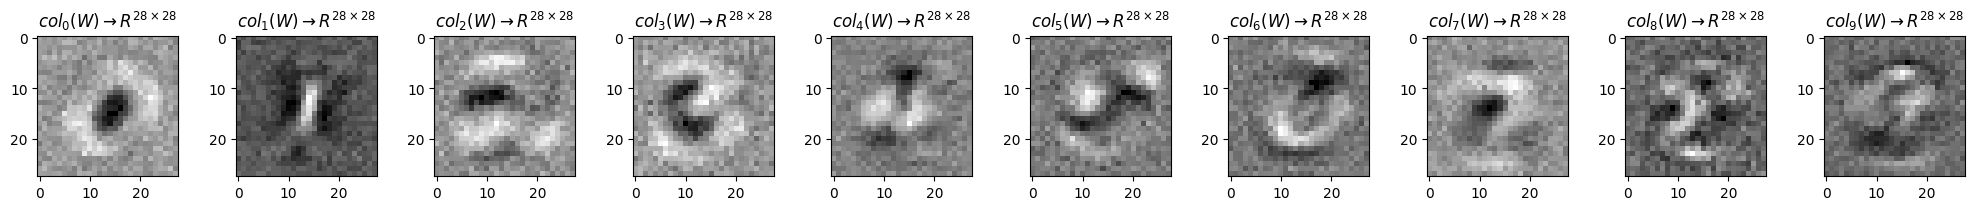

In [95]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
fig.tight_layout()
for i in range(10):
    w_i = W[:, i].detach()
    ax[i].imshow(w_i.view(28,28), cmap='gray', label = "{}".format(i))
    #this line works fine in VSCode, but not here
    #ax[i].set_title(r"$col_{}(W)\to \mathbb{{R}}^{{28\times 28}}$".format(i))
    ax[i].set_title(r"$col_{}(W)\to R^{{28\times 28}}$".format(i))